In [3]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
from matplotlib import cm
from matplotlib.colors import Normalize

plt.style.use('matplotlib.mplstyle')

DATA_DIR = 'Data/'
CASE = '2M_0.02.txt'

col_names = ['Step','t','M','LogL','LogR',
                 'LogTs','LogTc','Logrhoc','logPc','psic',
                 'Xc','Yc','XCc','XNc','XOc',
                 'taudyn','tauKH','taunuc','Lpp','LCNO',
                 'L3a','LZ','Lv','MHe','MC',
                 'MO','RHe','RC','RO']
    

col_names_structure = ['Mr','r','Lr','P','rho',
                 'T','U','S','Cp','adia1',
                 'nablaad','mu','ne','Pe','Pr',
                 'nablarad','nabla','vc','kappa','epsnuc',
                 'epspp','epscno','eps3alpha','epsvnuc','epsv', 'epsgrav',
                 'X','-','X+','Y', 'Y+', 'Y++', 'XC', 'XN', 'XO', 'Psi']




### 3.1 Radial and temporal dependence of stellar properties

#### Stellar surface and stellar core

C:\Users\amirt\AppData\Local\Temp\ipykernel_1516\3015933564.py:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(data_dir + data_name, delim_whitespace=True, header=None)
C:\Users\amirt\AppData\Local\Temp\ipykernel_1516\3015933564.py:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(data_dir + data_name, delim_whitespace=True, header=None)


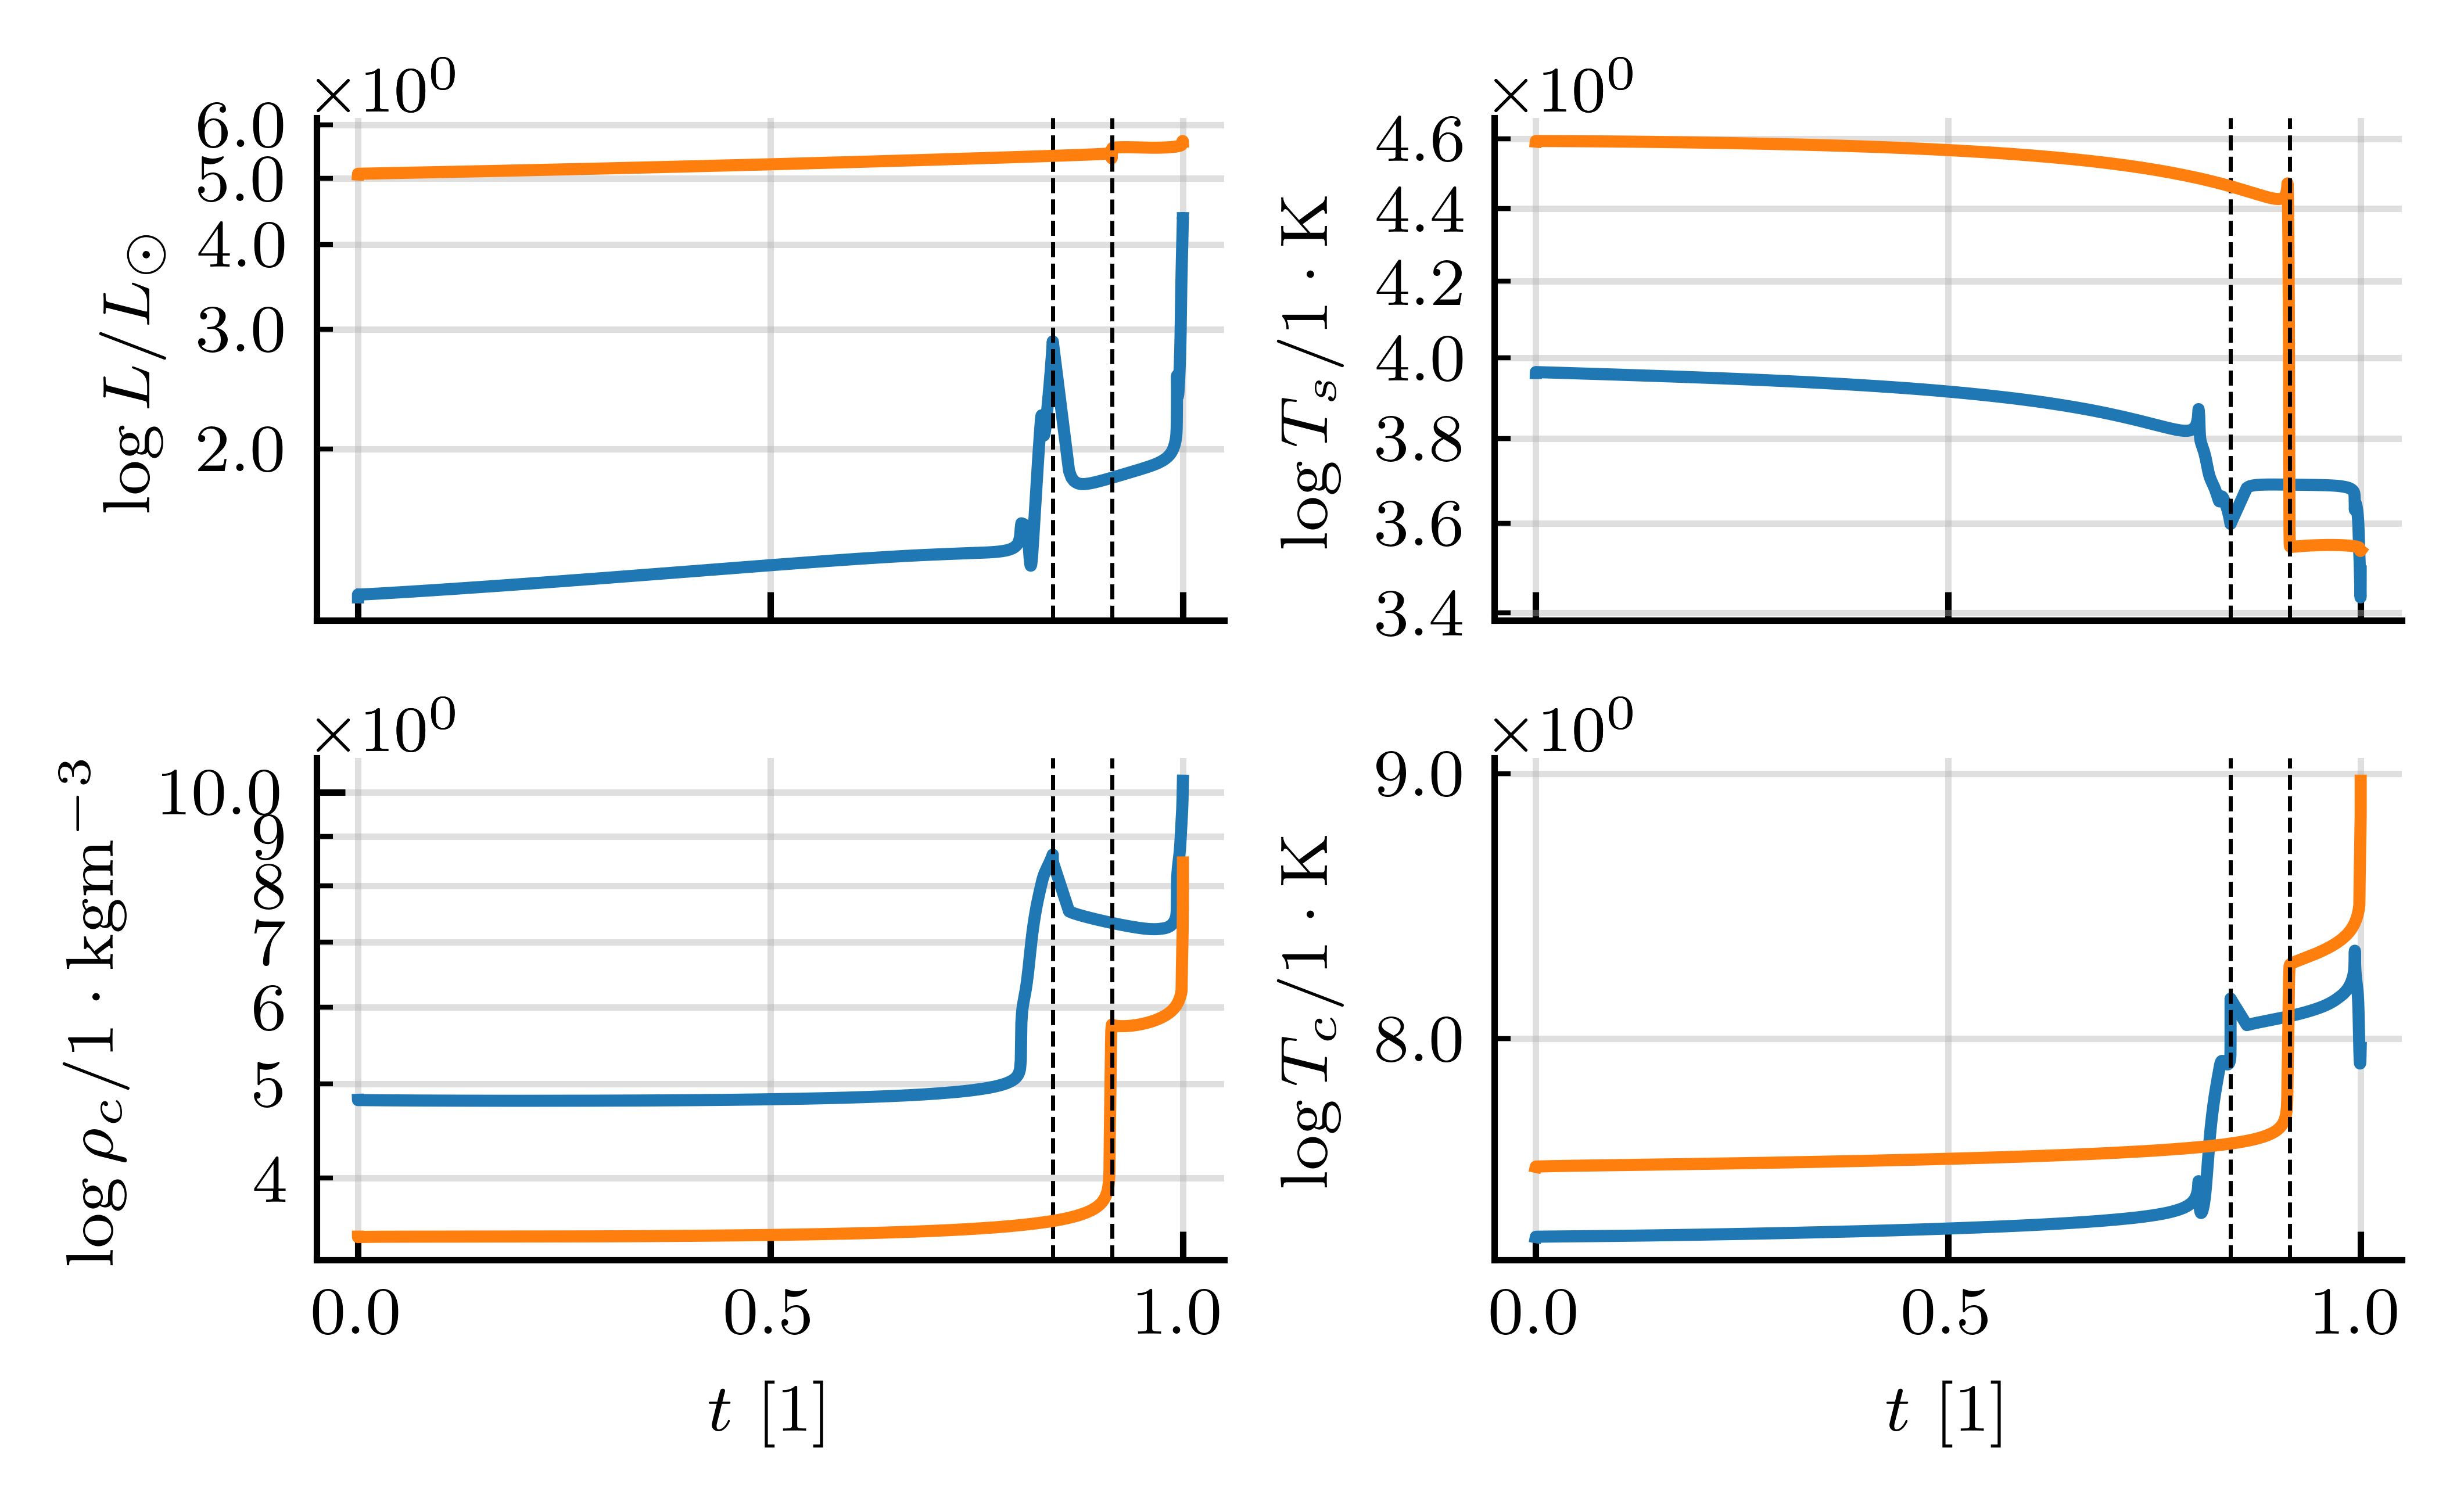

In [15]:
from scipy.signal import find_peaks
def plot_data(data_files, data_dir='Data/'):

    fig, axs = plt.subplots(2, 2, sharex=True)
        
    for data_name in data_files:
        df = pd.read_csv(data_dir + data_name, delim_whitespace=True, header=None)
        df.columns = col_names
        df.drop(columns=['Step'], inplace=True)

        
        axs[0, 0].semilogy(df['t'] / 1e9, df['LogL'])
        axs[0, 0].set_ylabel(r"$\log L/L_\odot$")
        
        axs[0, 1].semilogy(df['t'] / 1e9, df['LogTs'])
        axs[0, 1].set_ylabel(r"$\log T_s / 1 \cdot \mathrm{K}$")
        
        axs[1, 0].semilogy(df['t'] / 1e9, df['Logrhoc'])
        axs[1, 0].set_xlabel(r"$t \ [\mathrm{10^9 \ yr}]$")
        axs[1, 0].set_ylabel(r"$\log \rho_c / \mathrm{1 \cdot kg m^{-3}}$")
        
        axs[1, 1].semilogy(df['t'] / 1e9, df['LogTc'])
        axs[1, 1].set_xlabel(r"$t \ [\mathrm{10^9 \ yr}]$")
        axs[1, 1].set_ylabel(r"$\log T_c/ 1 \cdot \mathrm{K}$")
        

        peaks_rhoc, _ = find_peaks(df['Logrhoc'], height = 5)
        
        # Print the peaks and mark them out in the plot
        for peak_rhoc in peaks_rhoc:
            axs[0, 0].axvline(x=df['t'][peak_rhoc] / 1e9, color='k', ls='--', lw=0.5)
            axs[0, 1].axvline(x=df['t'][peak_rhoc] / 1e9, color='k', ls='--', lw=0.5)
            axs[1, 0].axvline(x=df['t'][peak_rhoc] / 1e9, color='k', ls='--', lw=0.5)
            axs[1, 1].axvline(x=df['t'][peak_rhoc] / 1e9, color='k', ls='--', lw=0.5)


        for ax in axs.flat:
            ax.yaxis.set_minor_formatter(ScalarFormatter(useMathText=True))
            ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
            ax.text(0.0, 1.0, r'$\times \mathrm{10^{0}}$', transform=ax.transAxes,
                    horizontalalignment='left', verticalalignment='bottom', fontsize=8)
            ax.grid(which='both', alpha=0.4, visible=True)
    plt.show()

data_files = [CASE] 
plot_data(data_files)


### Stellar interior

- Density, temperature, hydrogen mass fraction, luminosity

In [67]:
import os

data_dir = r'c:\Users\amirt\OneDrive - Chalmers\Teknisk fysik\MSc. Physics\M1\Stellar Physics (RRY145)\Project\structure-files'

def format_data_name(data_name):
    parts = data_name.split('_')
    mass_part = parts[0].lower().replace('m', 'msun')
    decimal_part = parts[1].replace('0.', '').replace('.txt', '') 
    new_name = f"{mass_part}_{decimal_part}_SI"
    return new_name

def get_structure_files(data_dir, time_frac):
    
    df = pd.read_csv(os.path.join(DATA_DIR, CASE),
                             delim_whitespace=True, header=None)
    df.columns = col_names
            
    all_files = os.listdir(data_dir)
    structure_files = [f for f in all_files if f.startswith("structure_")]
    
    # Load first file to extract time column
    df_ref = pd.read_csv(os.path.join(data_dir, structure_files[0]), delim_whitespace=True, header=None)
    df_ref.columns = col_names_structure
    
    # Find indices closest to given time fractions
    time_frac_idx = [np.argmin(np.abs(df['t'] - (t * np.max(df['t'])))) for t in time_frac]
    
    formatted_indices = [str(idx).zfill(5) for idx in time_frac_idx]
    filtered_files = [f for f in structure_files if f[10:15] in formatted_indices]
    
    return sorted(filtered_files)


def get_max_num(data_dir):
    all_files = os.listdir(data_dir)
    structure_files = [f for f in all_files if f.startswith("structure_")]
    time_steps = [int(f[10:15]) for f in structure_files]
    max_time_step = max(time_steps) if time_steps else 0
    
    return max_time_step



C:\Users\amirt\AppData\Local\Temp\ipykernel_28452\1307801343.py:14: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(os.path.join(DATA_DIR, CASE),
C:\Users\amirt\AppData\Local\Temp\ipykernel_28452\1307801343.py:22: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_ref = pd.read_csv(os.path.join(data_dir, structure_files[0]), delim_whitespace=True, header=None)
C:\Users\amirt\AppData\Local\Temp\ipykernel_28452\1039257568.py:13: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=None)


c:\Users\amirt\OneDrive - Chalmers\Teknisk fysik\MSc. Physics\M1\Stellar Physics (RRY145)\Project\structure-files\2msun_02_SI structure_00635.txt


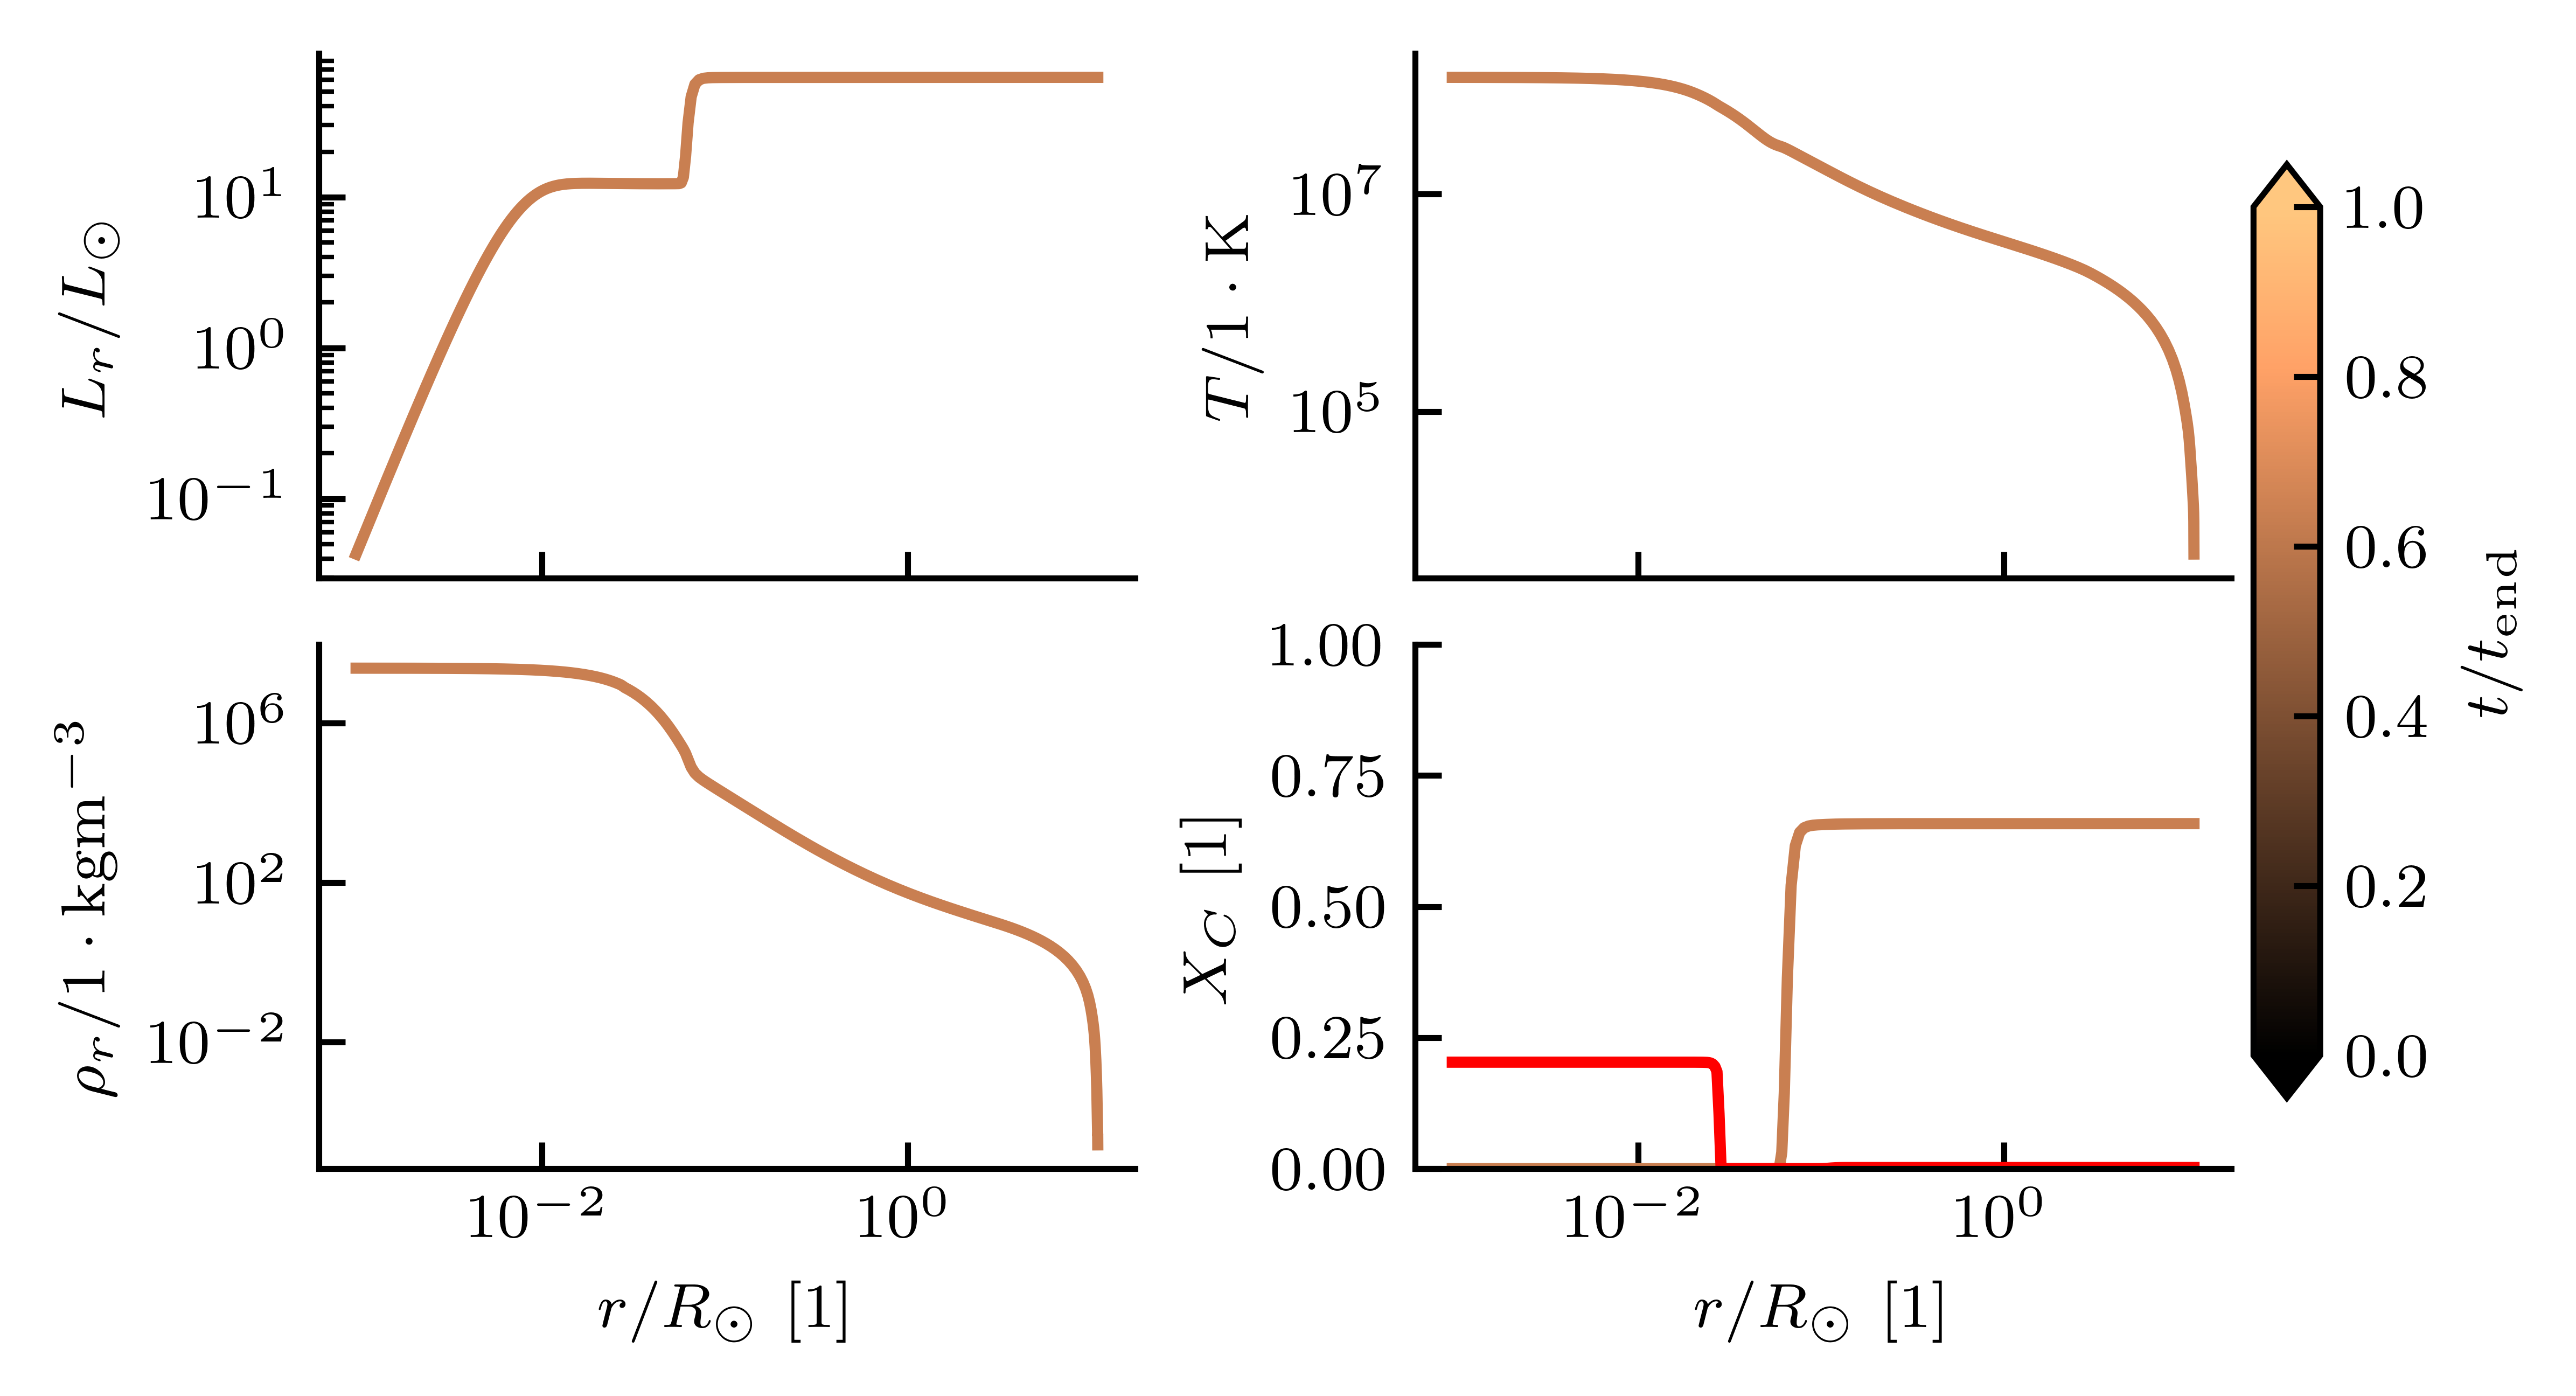

In [100]:
def plot_data(data_files, data_dir, max_iter):

    fig, axs = plt.subplots(2, 2, sharex=True)
    cmap = cm.copper
    norm = Normalize(vmin=0, vmax=1)
    
    for data_name in data_files:
        
        print(data_dir, data_name)
        file_path = os.path.join(data_dir, data_name)
        
        df = pd.read_csv(file_path, delim_whitespace=True, header=None)
        df.columns = col_names_structure
        
        r = df['r']
        
        time_percentage = int(data_name[10:15])/max_iter 
        color = cmap(norm(time_percentage)) 
        
        axs[0, 0].loglog(r, df['Lr'], color = color)
        axs[0, 0].set_ylabel(r"$L_r/L_\odot$")
        
        axs[0, 1].loglog(r, df['T'], color = color)
        axs[0, 1].set_ylabel(r"$T / 1 \cdot \mathrm{K}$")
        
        axs[1, 0].loglog(r, df['rho'], color = color)
        axs[1, 0].set_xlabel(r"$r/R_\odot$ [1]")
        axs[1, 0].set_ylabel(r"$\rho_r / \mathrm{1 \cdot kg m^{-3}}$")
        
        axs[1, 1].semilogx(r, df['X'], color = color)
        axs[1,1].set_ylim(0,1)
        axs[1, 1].set_xlabel(r"$r/R_\odot$ [1]")
        axs[1, 1].set_ylabel(r"$X$ [1]")
        
        axs[1, 1].semilogx(r, df['XC'], color = 'red')
        axs[1,1].set_ylim(0,1)
        axs[1, 1].set_xlabel(r"$r/R_\odot$ [1]")
        axs[1, 1].set_ylabel(r"$X_C$ [1]")
        
    cbar_ax = fig.add_axes([1., 0.2, 0.03, 0.7])  
    cbar = fig.colorbar(cm.ScalarMappable(cmap=cmap, norm=norm), cax=cbar_ax, extend = "both", aspect = 0.8)
    cbar.set_label(r'$t/t_\mathrm{end}$')

    
    plt.savefig("2M_interior.pdf")
    plt.show()
        
res = format_data_name(CASE)
full_path = os.path.join(data_dir, res)
max_iter = get_max_num(full_path)

time_frac =  [0.9]
data_files = get_structure_files(full_path, time_frac)
plot_data(data_files, full_path, max_iter)

### Finding timestamp at which hydrogen burning is over

We will run a minimization problem for the time fraction for which we find that X is close to 0 for small radii. 

In [ ]:
from scipy.optimize import minimize_scalar

res = format_data_name(CASE)
full_path = os.path.join(data_dir, res)

def load_X_data(time_frac):
    file_name = get_structure_files(full_path, [time_frac])[0]
    temp_path = os.path.join(full_path, '')
    file_path = os.path.join(temp_path, file_name)
    print(file_path)
    df = pd.read_csv(file_path, delim_whitespace=True, header=None)
    df.columns = col_names_structure
    return df['r'], df['X']

def constraint(time_frac, max_radius, threshold, data_dir):
    r, X_vals = load_X_data(time_frac)
    valid_indices = r <= max_radius
    return max(X_vals[valid_indices]) - threshold if any(valid_indices) else np.inf

def find_optimal_time_frac(max_radius, threshold, data_dir):
    result = minimize_scalar(lambda tf: abs(constraint(tf, max_radius, threshold, data_dir)),
                             bounds=(0, 1), method='bounded')
    return result.x if result.success else None

max_radius = 0.1
threshold = 0.01
optimal_time_frac = find_optimal_time_frac(max_radius, threshold, data_dir)


In [96]:
print(f"optimal_time_frac = {optimal_time_frac}")

optimal_time_frac = 0.7979027632754584


### Animation for slides

In [ ]:
def animate_stellar_interior(data_files, data_dir, max_iter, output_gif="stellar_interior_30.gif"):
    
    fig, axs = plt.subplots(2, 2, sharex=True)
    cmap = cm.copper
    norm = Normalize(vmin=0, vmax=1)
    
    axs[0, 0].set_ylabel(r"$L_r/L_\odot$")
    axs[0, 1].set_ylabel(r"$T / 1 \cdot \mathrm{K}$")
    axs[1, 0].set_xlabel(r"$r/R_\odot$ [1]")
    axs[1, 0].set_ylabel(r"$\rho_r / \mathrm{1 \cdot kg m^{-3}}$")
    axs[1, 1].set_xlabel(r"$r/R_\odot$ [1]")
    axs[1, 1].set_ylabel(r"$X$ [1]")
    
    cbar_ax = fig.add_axes([1.0, 0.2, 0.03, 0.7])  
    cbar = fig.colorbar(cm.ScalarMappable(cmap=cmap, norm=norm), cax=cbar_ax, extend="both", aspect=0.8)
    cbar.set_label(r'$t/t_\mathrm{end}$')

    def update(frame):
        
        axs[0, 0].cla()
        axs[0, 1].cla()
        axs[1, 0].cla()
        axs[1, 1].cla()
        
        data_name = data_files[frame]
        file_path = os.path.join(data_dir, data_name)
        df = pd.read_csv(file_path, delim_whitespace=True, header=None)
        df.columns = col_names_structure  

        r = df['r']
        time_percentage = int(data_name[10:15]) / max_iter 
        color = cmap(norm(time_percentage))  

        for ax in axs.flat:
            ax.set_xlim(1e-3, 1e2) 
        
        axs[0, 0].set_ylim(1e-2, 1e5)
        axs[0, 1].set_ylim(1e4, 1e9)
        axs[1,0].set_ylim(1, 1e4)
        axs[1, 1].set_ylim(0,1)
        
        axs[0, 0].loglog(r, df['Lr'], color = color)
        axs[0, 1].loglog(r, df['T'], color = color)
        axs[1, 0].loglog(r, df['rho'], color = color)
        axs[1, 1].semilogx(r, df['X'], color = color)
        
        axs[0, 0].set_ylabel(r"$L_r/L_\odot$")
        axs[0, 1].set_ylabel(r"$T / 1 \cdot \mathrm{K}$")
        axs[1, 0].set_xlabel(r"$r/R_\odot$ [1]")
        axs[1, 0].set_ylabel(r"$\rho_r / \mathrm{1 \cdot kg m^{-3}}$")
        axs[1, 1].set_xlabel(r"$r/R_\odot$ [1]")
        axs[1, 1].set_ylabel(r"$X$ [1]")

        return axs
    
    ani = animation.FuncAnimation(fig, update, frames=len(data_files), interval=200, repeat = True)
    ani.save(output_gif, writer=animation.PillowWriter(fps=5))

    plt.show()

res = format_data_name(data_name)
full_path = os.path.join(data_dir, res)
max_iter = get_max_num(full_path)

input_digits = [str(int(x)).zfill(5) for x in range(0, max_iter, 20)]
data_files = get_structure_files(full_path, input_digits)

animate_stellar_interior(data_files, full_path, max_iter)


C:\Users\amirt\AppData\Local\Temp\ipykernel_28452\1307801343.py:14: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(os.path.join(DATA_DIR, CASE),
C:\Users\amirt\AppData\Local\Temp\ipykernel_28452\1307801343.py:22: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_ref = pd.read_csv(os.path.join(data_dir, structure_files[0]), delim_whitespace=True, header=None)


TypeError: can't multiply sequence by non-int of type 'numpy.float64'